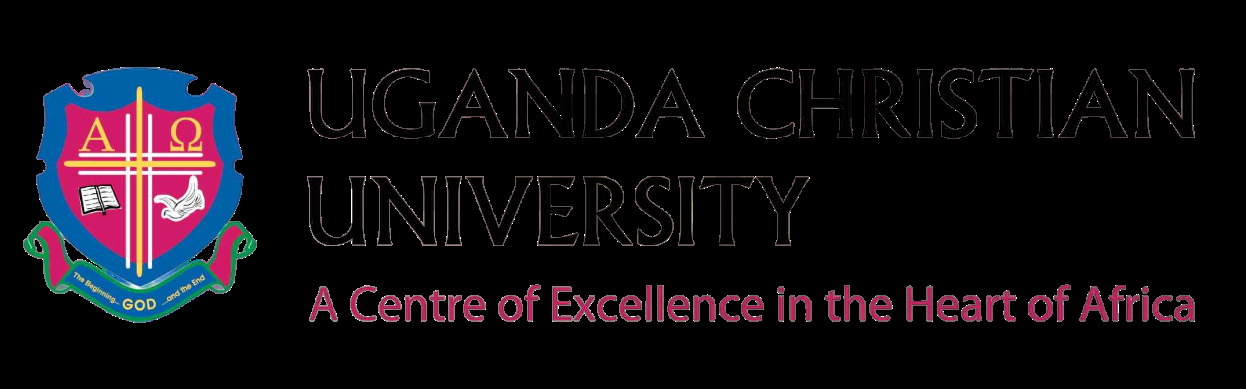
FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY

DEPARTMENT OF COMPUTING AND TECHNOLOGY

EASTER 2025 SEMESTER EXAMINATION

NAME: CHEMAYEK MARTIN   REG NUMBER: J25M19/026  ACCESS NUMBER: B31377

PROGRAM: MASTER OF SCIENCE IN DATA SCIENCE & ANALYTICS

YEAR: 1 SEMESTER: 1

COURSE CODE: DSC8201

COURSE NAME: DATA SCIENCE LIFECYCLE

EXAMINATION TYPE: PROJECT-BASED EXAM


Theme 2: Human Behaviour- Sentiment Analysis of mental well being and societal hermony 

In [1]:
#Importing necessary library
import pandas as pd
import numpy as np
import nltk
import re
import spacy
import string
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Download NLTK stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer 
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

1: Data Collections/loading the dataset
* Secondary data from Data.world for Mental Health Sentiment Analysis/NLP/ML. 

In [ ]:
# Load the Dataset
df_text = pd.read_csv("Combined Data.csv", encoding='latin-1')

2: Data Preprocessing

In [11]:
#rename variables
df_text.rename(columns={'statement': 'Text', 'status': 'Lebels'}, inplace=True)
# Drop unnamed column 
df_text = df_text.drop('Unnamed: 0', axis=1)
#View data
print(df_text.head(10))

                                                Text   Lebels
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety
5  every break, you must be nervous, like somethi...  Anxiety
6  I feel scared, anxious, what can I do? And may...  Anxiety
7    Have you ever felt nervous but didn't know why?  Anxiety
8  I haven't slept well for 2 days, it's like I'm...  Anxiety
9                 I'm really worried, I want to cry.  Anxiety


In [12]:
# Check for missing values
df_text.isnull().sum()

Text      0
Lebels    0
dtype: int64

In [13]:
# Drop all missing values
df_text = df_text.dropna()

In [14]:
#Check for duplicates 
df_text.duplicated().sum()

0

In [15]:
# Remove duplicates based on column 'Sentiment'
df_text = df_text.drop_duplicates(subset='Text')

In [16]:
# Check for info
print(df_text.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51068 entries, 0 to 52841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    51068 non-null  object
 1   Lebels  51068 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [17]:
# Combine all sentiments into a single string
Text = " ".join(article for article in df_text["Text"])

In [18]:
# Remove all the special characters 
textclean = re.sub(r'[?|$|.|!]',r' ',Text)
# remove everything which is not Alphabets
cleantext = re.sub(r'[^a-z A-Z]',r' ',Text)
# Convert the whole text to lowercase
cleantext = cleantext.lower() 
# Delete any word which is less than 3-characters mostly those are stopwords
cleantext= re.sub(r'\b\w{1,3}\b', ' ', cleantext)
# Strip off extra spaces in the text
cleantext= re.sub(r' +', ' ', cleantext)

In [40]:
# Preprocess the text data
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(f'[{string.punctuation}]', '', text)  
    text = re.sub('\d+', '', text)  
    words = text.split()
    stop_words = set(["the", "and", "to", "of", "a", "in", "that", "it", "with", "is", "was", "for", "on", "as", "at", "by", "an", "be", "u", "us"])
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df_text["clean_text"] = df_text["Text"].apply(preprocess_text)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_3636\3570198267.py:5: SyntaxWarning: invalid escape sequence '\d'
  text = re.sub('\d+', '', text)


Step 3: Exploratory Data Analysis (EDA)

a. Analyze historical performance over time and across regions.

3. Exploratory Data Analysis (EDA)

a. Explore Text Frequency Distribution

To understand which words appear most often in the text, we can create a frequency distribution and visualize it via both a bar plot and a word cloud.

In [24]:
# Import nuccessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [41]:
# Combine all cleaned text into one large text string
all_text = " ".join(df_text['clean_text'])
words = all_text.split()

 # Count word frequencies
word_freq = Counter(words)
# top 20 words
top_words = word_freq.most_common(20)

# Unzip words and counts
words_list, counts = zip(*top_words)

C:\Users\User\AppData\Local\Temp\ipykernel_3636\3405749108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(counts), palette='viridis')


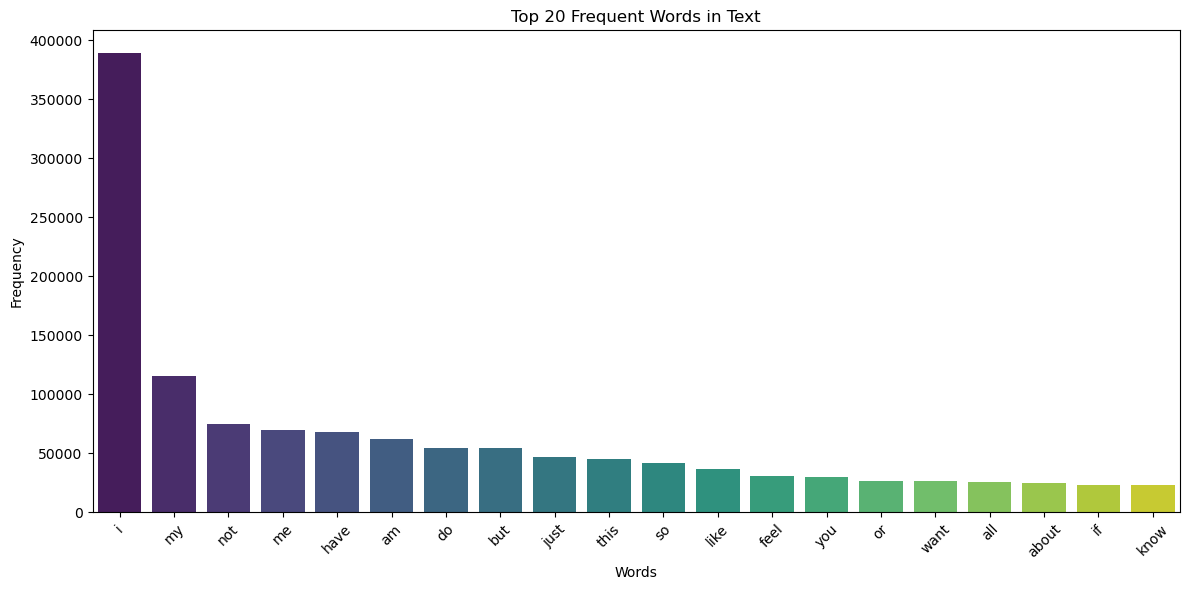

In [42]:
# Bar plot of the 20 most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words_list), y=list(counts), palette='viridis')
plt.title('Top 20 Frequent Words in Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation 

* The barplot above plots the first 20 most frequent word and indicates that the word i is most said more than 38,000 times followed by my and not in the third.

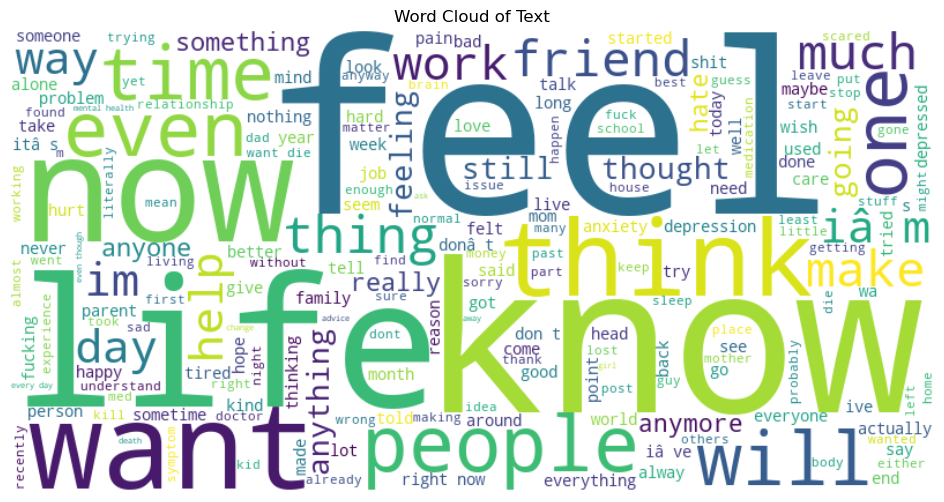

In [23]:
# Generate and display a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Text')
plt.show()

Interpretation 

* The most frequent words in the above word cloud are Feel, Know, Life, Now, think and want. 

b. Explore Sentiment-Label Distribution

We can visualize the distribution to confirm data balance and reveal dataset characteristics.

C:\Users\User\AppData\Local\Temp\ipykernel_3636\811126632.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


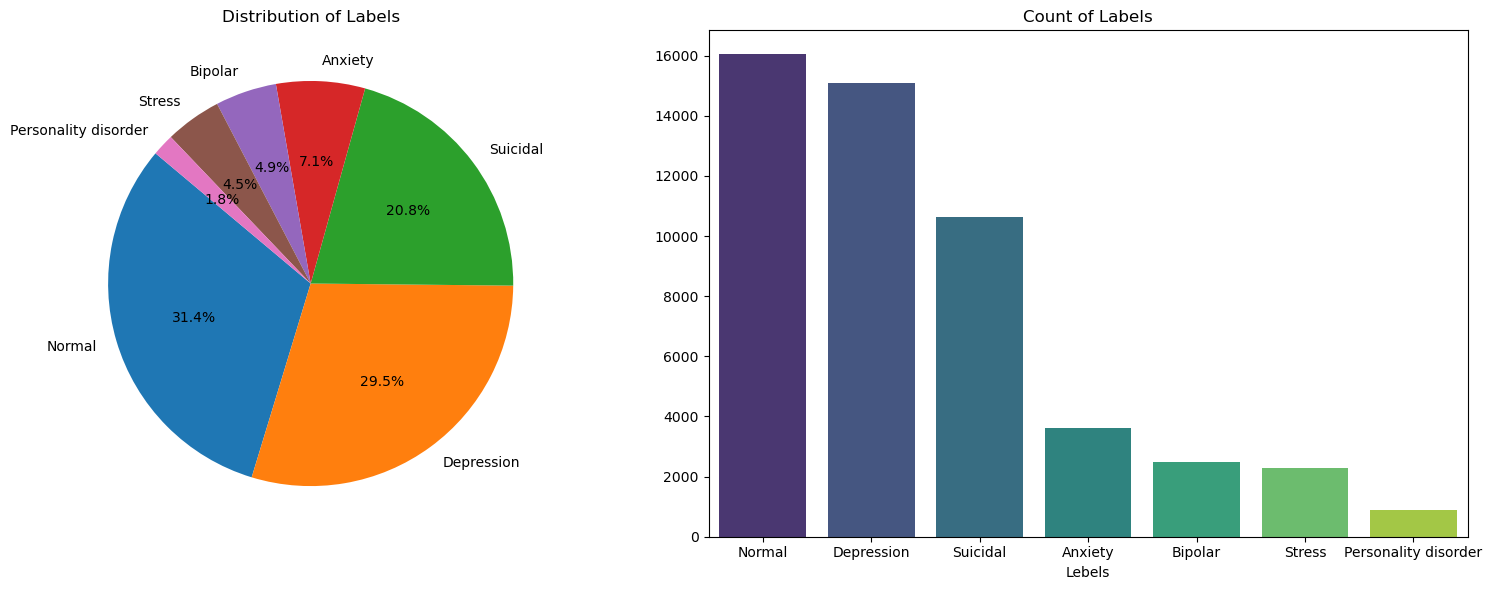

In [25]:
# Value Count Of Labels
count = df_text['Lebels'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Labels')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Labels')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Interpretation 

* From the visuals above, the pie chart indcates Normal leading with 31.4% with the most counts over 16000 followed by Depression 29.5% with over 15000 counts as indicated in the barplot.

c. Generate Additional Visuals

i. Inspect length of the statements/text

Using Boxplot to to see if longer or shorter statements are typical

C:\Users\User\AppData\Local\Temp\ipykernel_3636\4157856697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lebels', y='text_length', data=df_text, palette='Set3')


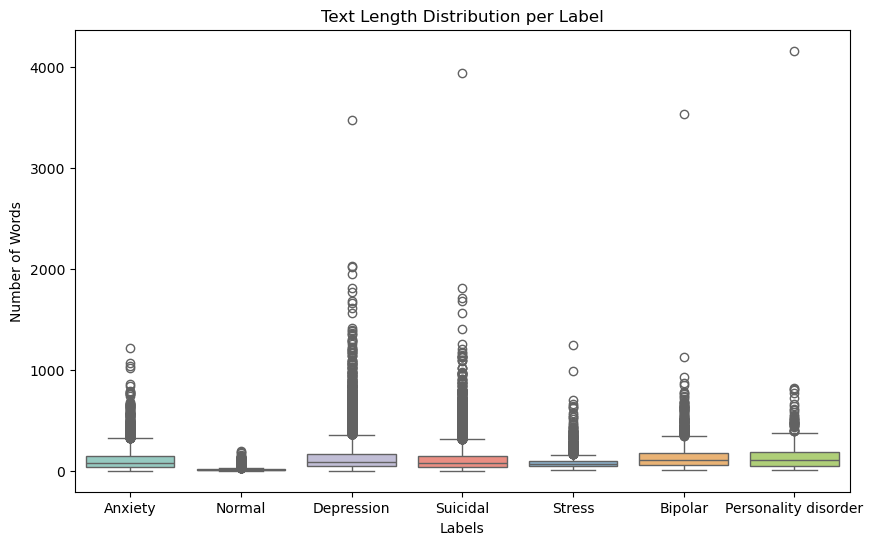

In [43]:
# Calculate the number of words in each cleaned statement
df_text['text_length'] = df_text['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Lebels', y='text_length', data=df_text, palette='Set3')
plt.title('Text Length Distribution per Label')
plt.xlabel('Labels')
plt.ylabel('Number of Words')
plt.show()

Interpretation 

* From the box plot above, number of words in label normal are few as has more counts which indicates that shorter statements are typical than longer text. 

ii. Visualize using wordcloud for each label 

In [27]:
# Make Seperate Data Set to Visualize text 
# Anxiety
df_Anxiety = df_text[df_text['Lebels']=='Anxiety']
# Normal
df_Normal = df_text[df_text['Lebels']=='Normal']
# Depression
df_Depression = df_text[df_text['Lebels']=='Depression']
# Suicidal
df_Suicidal = df_text[df_text['Lebels']=='Suicidal']
# Stress
df_Stress = df_text[df_text['Lebels']=='Stress']
# Bipolar
df_Bipolar = df_text[df_text['Lebels']=='Bipolar']

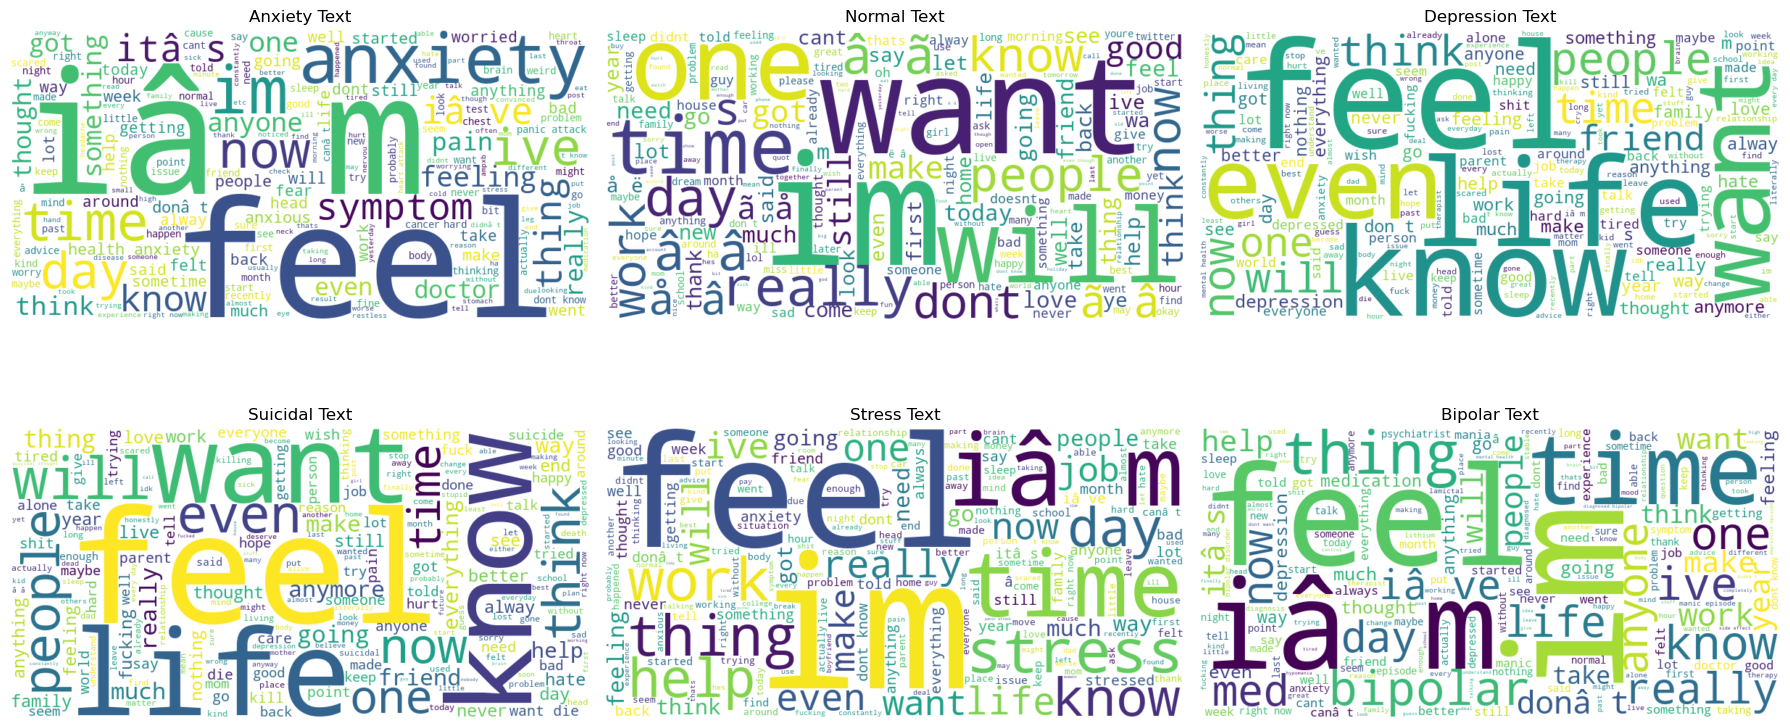

In [28]:
# Combine text from different categories
combined_Anxiety_text = ' '.join(df_Anxiety['Text'])
combined_Normal_text = ' '.join(df_Normal['Text'])
combined_Depression_text = ' '.join(df_Depression['Text'])
combined_Suicidal_text = ' '.join(df_Suicidal['Text'])
combined_Stress_text = ' '.join(df_Stress['Text'])
combined_Bipolar_text = ' '.join(df_Bipolar['Text'])

# Create word clouds
Anxiety_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Anxiety_text)
Normal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Normal_text)
Depression_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Depression_text)
Suicidal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Suicidal_text)
Stress_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Stress_text)
Bipolar_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_Bipolar_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(Anxiety_wordcloud, interpolation='bilinear')
plt.title('Anxiety Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(Normal_wordcloud, interpolation='bilinear')
plt.title('Normal Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(Depression_wordcloud, interpolation='bilinear')
plt.title('Depression Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(Suicidal_wordcloud, interpolation='bilinear')
plt.title('Suicidal Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(Stress_wordcloud, interpolation='bilinear')
plt.title('Stress Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(Bipolar_wordcloud, interpolation='bilinear')
plt.title('Bipolar Text')
plt.axis('off')

plt.tight_layout()
plt.show()

Interpretation 

* Feel and i are common among all categories of label 

4. Build, Evaluate, and Optimize Predictive Models

a. Supervised Machine Learning Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
# Define features and labels: we use the cleaned statements to predict the status
X = df_text['Text']
y = df_text['Lebels']

In [31]:
# Split data (even though labels are uniform, this sets up the process)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=50000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [61]:
# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train_vect, y_train)


LogisticRegression(max_iter=500)

In [62]:
# Make predictions on the test set
predictions = classifier.predict(X_test_vect)

In [63]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.82      0.78      0.80       703
             Bipolar       0.89      0.73      0.80       549
          Depression       0.71      0.75      0.73      3006
              Normal       0.87      0.95      0.91      3223
Personality disorder       0.82      0.34      0.48       186
              Stress       0.65      0.44      0.53       461
            Suicidal       0.70      0.68      0.69      2086

            accuracy                           0.78     10214
           macro avg       0.78      0.67      0.71     10214
        weighted avg       0.77      0.78      0.77     10214

Accuracy: 0.7770706872919523


Interpretation 

* The model is 77.7% accurate

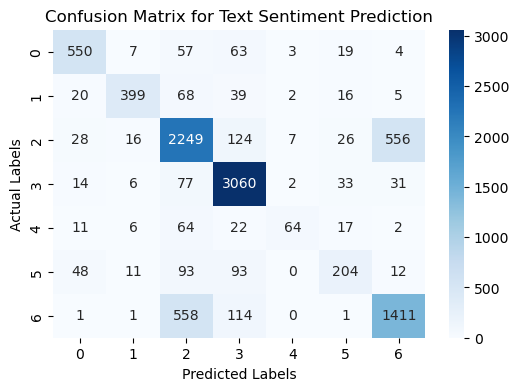

In [64]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Text Sentiment Prediction')
plt.show()

Interpretation 
* 550 instances with an actual label of Anxiety were correctly predicted as Anxiety.
* 399 instances with an actual label of Normal were correctly predicted as Normal
* 2249 instances with an actual label of Depression were correctly predicted as Depression.
* 3060 instances with an actual label of Suicidal were correctly predicted as Suicidal.
* 64 instances with an actual label of Stress were correctly predicted as Stress.
* 204 instances with an actual label of Bipolar were correctly predicted as Bipolar.
* 1411 instances with an actual label of Personality disorders were correctly predicted as personality disorders.




b. Validation with Hypothetically-Generated Text Data


In [65]:
# Hypothetically generated text samples (these could be anxiety-related or not)
new_texts = pd.Series([
    "I feel uneasy and my heart races at the thought of tomorrow.",
    "Today was calm and nothing seemed to disturb my peace.",
    "The constant worry and racing mind are overwhelming."
])

# Clean the new texts
new_texts_clean = new_texts.apply(preprocess_text)
# Transform using the same TF-IDF vectorizer
new_texts_vect = vectorizer.transform(new_texts_clean)
# Predict the sentiment/status
new_predictions = classifier.predict(new_texts_vect)
print("Predicted labels for New Data:", new_predictions)

Predicted labels for New Data: ['Normal' 'Normal' 'Anxiety']


c. Unsupervised Machine Learning: Clustering

Even with a single labeled class, unsupervised clustering can reveal underlying structure in how anxiety is expressed. We use KMeans to see if statements naturally group into different clusters (which might correspond to various expressions like worry, restlessness, or confusion).

In [66]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [67]:
statement = df_text['Text']
vectorizer = TfidfVectorizer(stop_words='english')

vectorized_documents = vectorizer.fit_transform(statement)

In [46]:
# Vectorize the entire cleaned statement dataset
Text_vect = vectorizer.transform(df_text['clean_text'])

In [82]:
# Select number of clusters (experiment with different values; here we use 3)
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_text['cluster'] = kmeans.fit_predict(vectorized_documents)

C:\Users\User\AppData\Local\Temp\ipykernel_3636\1667496373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_text, palette='Set2')


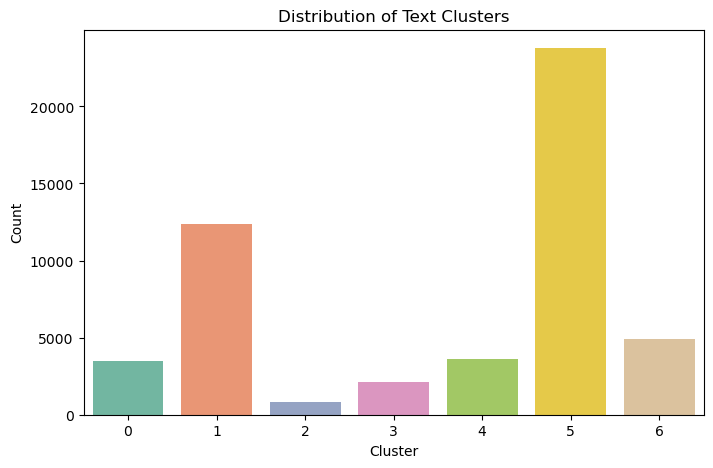

In [83]:
# Visualize cluster counts
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df_text, palette='Set2')
plt.title('Distribution of Text Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [85]:
# Use PCA to reduce the dimensionality for easier visualization
pca = PCA(n_components=7)
Text_reduced = pca.fit_transform(vectorized_documents.toarray())

MemoryError: Unable to allocate 28.9 GiB for an array with shape (51068, 75990) and data type float64

ValueError: 'c' argument has 51068 elements, which is inconsistent with 'x' and 'y' with size 1.

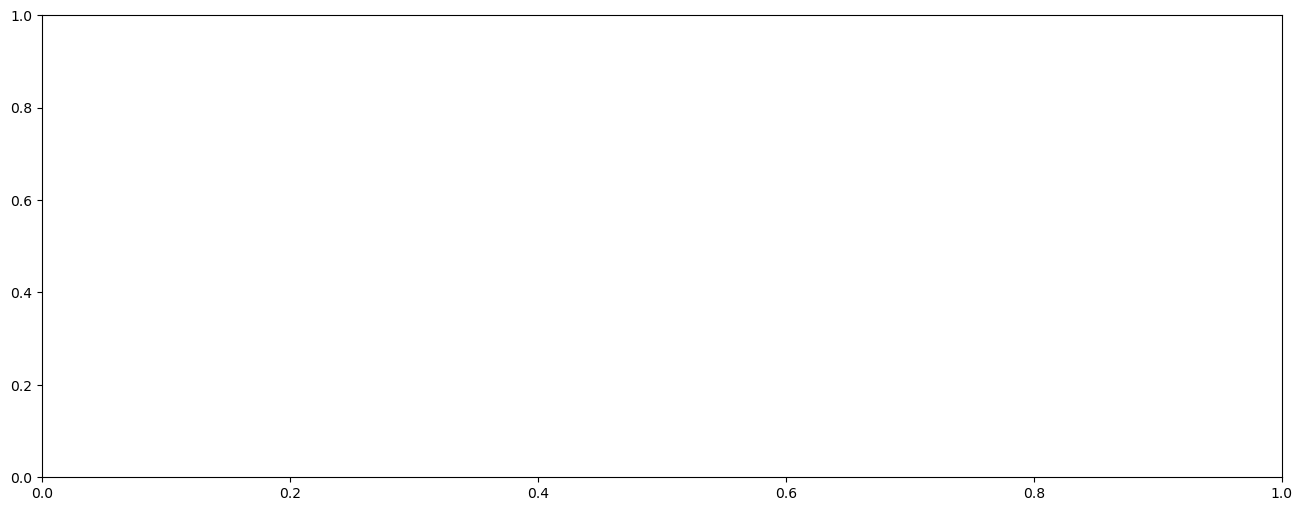

In [86]:
plt.figure(figsize=(16, 6))
scatter = plt.scatter(vectorized_documents[:, 0], vectorized_documents[:, 1], c=df_text['cluster'], cmap='viridis', alpha=0.7)
plt.title('2D Visualization of Text Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()